<a href="https://colab.research.google.com/github/dvsmihir1/ML-Lab/blob/main/ML5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
dfcases = pd.read_csv("https://api.vitaldb.net/cases")

Q1) If your project deals with a regression problem, please use one attribute of your dataset
(X_train) along with the target values (y_train) for training a linear regression model. Sample code
suggested below.

from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

y_train_pred = reg.predict(X_train)

(P.S.: If your project deals with a classification or clustering problem, please consider one of the
attributes with numerical values as target values.)

In [2]:
X = dfcases[['weight']]  # This will be the predictor
y = dfcases['height']  # This will be the target
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Train the linear regression model
reg = LinearRegression().fit(X_train, y_train)
# Predict on the training data
y_train_pred = reg.predict(X_train)
# Print the coefficients and intercept
print("Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)
# Print the first few predicted values
print("Predicted values:", y_train_pred[:5])

Coefficients: [0.489448]
Intercept: 132.13908887548013
Predicted values: [168.84768921 157.1988267  162.68064435 155.77942749 159.84184593]


Q2) Calculate MSE, RMSE, MAPE and R2 scores for prediction made by the trained model in A1.  
Perform prediction on the test data and compare the metric values between train and test set.

In [3]:
y_train_pred = reg.predict(X_train) # Use the trained regression model to predict the target variable for the training data
y_test_pred = reg.predict(X_test) # Use the trained regression model to predict the target variable for the test data
# Calculate metrics for the training set
mse_train = mean_squared_error(y_train, y_train_pred) # MSE measures the average squared difference between predicted and actual values
rmse_train = np.sqrt(mse_train) # RMSE is the square root of MSE and provides an error metric in the same units as the target variable
mape_train = mean_absolute_percentage_error(y_train, y_train_pred) # MAPE expresses the prediction error as a percentage, which is useful for understanding the error relative to the size of the actual values
r2_train = r2_score(y_train, y_train_pred)# R2 indicates how well the model explains the variability of the target variable; values closer to 1 suggest a better fit

In [4]:
# Calculate metrics for the test set
mse_test = mean_squared_error(y_test, y_test_pred) # MSE measures the average squared difference between the predicted values and the actual values in the test set
rmse_test = np.sqrt(mse_test) # RMSE is the square root of MSE, providing an error metric that is in the same units as the target variable
mape_test = mean_absolute_percentage_error(y_test, y_test_pred) # MAPE expresses the prediction error as a percentage of the actual values, useful for understanding relative accuracy
r2_test = r2_score(y_test, y_test_pred) # R2 indicates how well the model explains the variability of the target variable in the test set; values closer to 1 suggest a better fit

In [6]:
print("Training Set Metrics:")
print(f"MSE: {mse_train:.12f}")
print(f"RMSE: {rmse_train:.12f}")
print(f"MAPE: {mape_train:.12f}")
print(f"R²: {r2_train:.12f}")
print("\nTest Set Metrics:")
print(f"MSE: {mse_test:.12f}")
print(f"RMSE: {rmse_test:.12f}")
print(f"MAPE: {mape_test:.12f}")
print(f"R²: {r2_test:.12f}")

Training Set Metrics:
MSE: 62.828607926006
RMSE: 7.926449894247
MAPE: 0.038002522349
R²: 0.353069418273

Test Set Metrics:
MSE: 66.048085205984
RMSE: 8.126997305646
MAPE: 0.039000403876
R²: 0.352525366376


Q3) Repeat the exercises A1 and A2 with more than one attribute or all attributes.

In [7]:
dfcases = pd.read_csv("https://api.vitaldb.net/cases")
numeric_cols = dfcases.select_dtypes(include=[np.number]).columns # Select only the numeric columns from the DataFrame for feature extraction
X = dfcases[numeric_cols].drop(columns=['weight'])  # Create the feature set X by dropping the 'weight' column from the numeric columns
# 'weight' is excluded as it is not needed for predicting 'height'
y = dfcases['height']   # Create the target variable y, which is the 'height' column from the DataFrame
X = X.fillna(X.mean())  # Fill missing values in the feature set X with the mean of each column
y = y.fillna(y.mean())  # Fill missing values in the feature set Y with the mean of each column
reg = LinearRegression().fit(X_train, y_train) # Fit a Linear Regression model using the training data (X_train and y_train)
y_train_pred = reg.predict(X_train) # Predict the target variable for the training set using the fitted model
y_test_pred = reg.predict(X_test) # Predict the target variable for the test set using the fitted model

In [8]:
# Split the dataset into training and testing sets
# 80% of the data will be used for training and 20% for testing
# random_state=0 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
reg = LinearRegression().fit(X_train, y_train) # Instantiate and fit a Linear Regression model using the training data (X_train and y_train)
# Predict the target variable for the training set using the fitted model
# This will provide insights into how well the model fits the training data
y_train_pred = reg.predict(X_train)
# Predict the target variable for the test set using the fitted model
# This allows for evaluating the model's performance on unseen data
y_test_pred = reg.predict(X_test)

In [9]:
mse_train = mean_squared_error(y_train, y_train_pred)# Calculate Mean Squared Error (MSE) for the training set predictions
# MSE measures the average squared difference between the actual values (y_train) and the predicted values (y_train_pred)
rmse_train = np.sqrt(mse_train)# Calculate Root Mean Squared Error (RMSE) for the training set
# RMSE is the square root of MSE, providing an error metric that is in the same units as the target variable (height)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred) # Calculate Mean Absolute Percentage Error (MAPE) for the training set
# MAPE expresses the prediction error as a percentage of the actual values, making it easier to interpret the accuracy relative to the size of the actual values
r2_train = r2_score(y_train, y_train_pred)# Calculate R-squared (R2) for the training set
# R2 indicates how well the model explains the variability of the target variable; values closer to 1 suggest a better fit

In [10]:
#Calculating it for test set data
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

In [11]:
print("Training Set Metrics (Multiple Attributes):")
print(f"MSE: {mse_train:.12f}")
print(f"RMSE: {rmse_train:.12f}")
print(f"MAPE: {mape_train:.12f}")
print(f"R²: {r2_train:.12f}")
print("\nTest Set Metrics (Multiple Attributes):")
print(f"MSE: {mse_test:.12f}")
print(f"RMSE: {rmse_test:.12f}")
print(f"MAPE: {mape_test:.12f}")
print(f"R²: {r2_test:.12f}")

Training Set Metrics (Multiple Attributes):
MSE: 0.000000000000
RMSE: 0.000000001839
MAPE: 0.000000000001
R²: 1.000000000000

Test Set Metrics (Multiple Attributes):
MSE: 0.000000000000
RMSE: 0.000000000148
MAPE: 0.000000000001
R²: 1.000000000000


Q4) Perform k-means clustering on your data. Please remove / ignore the target variable for
performing clustering. Sample code suggested below.

In [12]:
# Check for overlap between X_train and X_test
overlap = X_train.index.intersection(X_test.index)
print(f"Overlap between train and test sets: {len(overlap)} rows")
# Check if the target is in the feature set
print("Is the target in the feature set?", 'target_column' in X.columns)
# Preview the data to spot any obvious issues
print(X_train.head())
print(y_train.head())

Overlap between train and test sets: 0 rows
Is the target in the feature set? False
      caseid  subjectid  casestart  caseend  anestart   aneend  opstart  \
2951    2952       2094          0    22517      -542  21958.0     3058   
5463    5464       1863          0     9877       468   9888.0     1788   
3270    3271       4147          0    12462      -641  12319.0     1519   
5700    5701       1725          0    13358     -1526  13714.0      514   
3553    3554       5217          0     8908      -547   7853.0     1613   

      opend      adm     dis  ...  intraop_colloid  intraop_ppf  intraop_mdz  \
2951  21058  -114540  663060  ...                0            0          0.0   
5463   8988  -114900  403500  ...                0            0          0.0   
3270  11419  -237840  539760  ...                0          120          0.0   
5700  12757 -4555560  542040  ...              100          100          0.0   
3553   8033  -122460   50340  ...                0            0  

In [13]:
# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X) # Fit the imputer to the feature set X and transform it to fill missing values
print(X_imputed.shape)

(6388, 54)


In [14]:
# Select numeric columns from the DataFrame and drop the 'bmi' column
# This creates the feature set X for clustering
X = dfcases[numeric_cols].drop(columns=['bmi'])
# Handle missing values
X = X.fillna(X.mean())
# Perform k-means clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto").fit(X) # Perform k-means clustering with 2 clusters
# random_state=42 ensures reproducibility, and n_init="auto" allows the algorithm to determine the number of initializations
# Output the cluster labels and centers
labels = kmeans.labels_ # Output the cluster labels assigned to each data point
cluster_centers = kmeans.cluster_centers_ # Output the coordinates of the cluster centers
print("Cluster Labels:", labels)
print("Cluster Centers:\n", cluster_centers)

Cluster Labels: [0 0 0 ... 0 0 0]
Cluster Centers:
 [[ 3.19429936e+03  3.04791451e+03  0.00000000e+00  1.13474043e+04
  -7.56783936e+02  1.12216754e+04  2.18838406e+03  1.03462529e+04
  -8.54427492e+05  5.03443258e+04  5.52841710e-01  8.92437764e-03
   5.72974793e+01  1.62189347e+02  6.14877376e+01  1.84953680e+00
   1.22436199e-01  3.07499609e-01  1.03491467e-01  1.28333048e+01
   2.41447357e+02  1.00435508e+02  3.28835646e+01  1.40026996e+02
   4.19634742e+00  1.15650653e+02  4.06374294e+00  3.24383280e+01
   3.02784542e+01  1.61558983e+01  1.07974970e+00  7.38956227e+00
   2.40735460e+01 -3.84962406e-01  1.02434572e+02  3.98907063e+01
   9.25898687e+01  7.21674464e+00  3.24509804e+00  3.63228661e+02
   2.50866874e+02  4.70486927e-01  1.28855488e-01  1.06009015e+03
   3.21133553e+01  3.97829967e+01  3.69500548e-02  1.70463441e+01
   7.28252701e+01  1.69093471e-02  7.74776891e+00  3.26283075e+01
   7.89588226e+00  1.20753875e+02]
 [ 4.47600000e+03  1.84600000e+03  0.00000000e+00  1.95

 Q5) For the clustering done in A4, calculate the: (i) Silhouette Score, (ii) CH Score and (iii) DB Index.

In [15]:
sil_score = silhouette_score(X, labels) # Calculate the silhouette score using the feature set X and the cluster labels
print(f"Silhouette Score: {sil_score:.12f}")

Silhouette Score: 0.999277284540


In [16]:
ch_score = calinski_harabasz_score(X, labels) # Calculate the calinski_harabasz score using the feature set X and the cluster labels
print(f"Calinski-Harabasz Score: {ch_score:.12f}")

Calinski-Harabasz Score: 3202.284922380475


In [17]:
db_score = davies_bouldin_score(X, labels) # Calculate the davies bouldin score using the feature set X and the cluster labels
print(f"Davies-Bouldin Score: {db_score:.12f}")

Davies-Bouldin Score: 0.000491238050


Q6) Perform k-means clustering for different values of k. Evaluate the above scores for each k value.
Make a plot of the values against the k value to determine the optimal cluster count.

In [18]:
silhouette_scores = [] # Initialize an empty list to store silhouette scores for different numbers of clusters
ch_scores = [] # Initialize an empty list to store calinski harabasz scores for different numbers of clusters
db_scores = [] # Initialize an empty list to store davies bouldin scores for different numbers of clusters
k_values = range(2, 11) #range of cluster values from 2 to 10

In [19]:
for k in k_values:  # Iterate over the range of cluster values
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X)  # Perform k-means clustering with k clusters
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels)) # Calculate the silhouette score for the current clustering
    ch_scores.append(calinski_harabasz_score(X, labels)) # Calculate the calinski harabasz score for the current clustering
    db_scores.append(davies_bouldin_score(X, labels)) # Calculate the davies bouldin score for the current clustering

In [20]:
# Plotting the metrics against k
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0, 0.5, 'Silhouette Score')

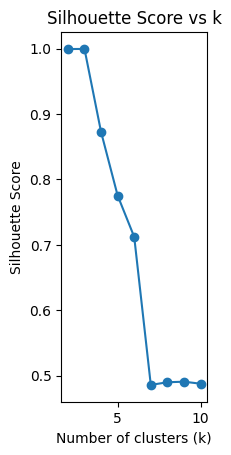

In [21]:
# Silhouette Score plot
plt.subplot(1, 3, 1) # Create a subplot in a 1x3 grid, in the first position
plt.plot(k_values, silhouette_scores, marker='o')  # Plot the silhouette scores against the number of clusters (k)
plt.title('Silhouette Score vs k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')

Text(0, 0.5, 'CH Score')

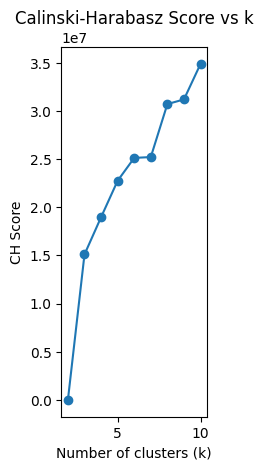

In [22]:
# Calinski-Harabasz Score plot
plt.subplot(1, 3, 2) # Create a subplot in a 1x3 grid, in the second position
plt.plot(k_values, ch_scores, marker='o') # Plot the calinski harabasz scores against the number of clusters (k)
plt.title('Calinski-Harabasz Score vs k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('CH Score')

Text(0, 0.5, 'DB Index')

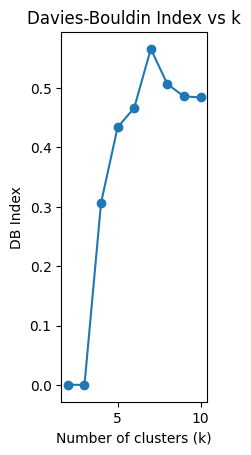

In [23]:
plt.subplot(1, 3, 3) # Create a subplot in a 1x3 grid, in the third position
plt.plot(k_values, db_scores, marker='o') # Plot the davies bouldin scores against the number of clusters (k)
plt.title('Davies-Bouldin Index vs k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('DB Index')

Q7) . Using elbow plot, determine the optimal k value for k-means clustering. Use below code

In [24]:
distortions = [] # Empty list to store the distortion values for different numbers of clusters
# Loop over the range of k values
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X) # Perform k-means clustering with k clusters
    distortions.append(kmeans.inertia_) # Append the inertia value to the distortions list

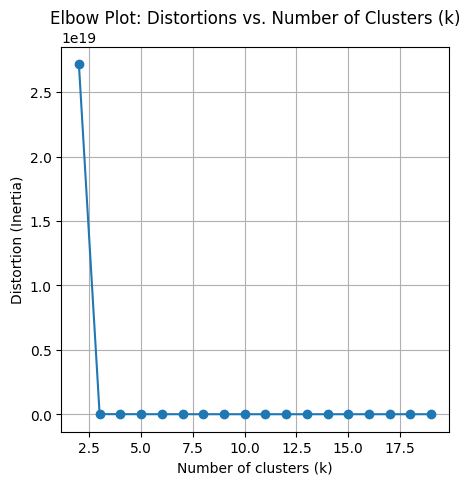

In [25]:
plt.figure(figsize=(5, 5)) # Create a new figure with a specified size
plt.plot(range(2, 20), distortions, marker='o') # Plot the distortions against the number of clusters (k)
plt.title('Elbow Plot: Distortions vs. Number of Clusters (k)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.grid(True) # Grid lines for better readability
plt.show()